In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
print("Imports Complete!")

Imports Complete!


In [4]:
df = pd.read_csv("car-data.csv")
print("Shape: ", df.shape)
print(df.head(4))
print(df.info)

Shape:  (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60  

In [9]:
# data cleaning

print(df.isna().sum())

# There are no null values here

df = df.drop_duplicates();

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [10]:
# Spliting numbers and categories

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric: ", num_cols)
print("Categorical: ", cat_cols)

Numeric:  ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Categorical:  ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [11]:
# target = Selling_Price
# x and y split for training and testing

target = 'Selling_Price'
features = [i for i in df.columns if i != target]

x = df[features]
y = df[target]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    random_state=42,
    test_size=0.2
)

In [13]:
# This is new to me (one-hot encode)

numeric_features = [c for c in num_cols if c != target]

categorical_features = cat_cols

numeric_transformer = 'passthrough'

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [26]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model)
])

In [27]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [28]:
y_pred = clf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RSME: \n", rsme)
print("\nR(Sqaure): \n", r2)

RSME: 
 3.293751367419073

R(Sqaure): 
 0.5790677184426827


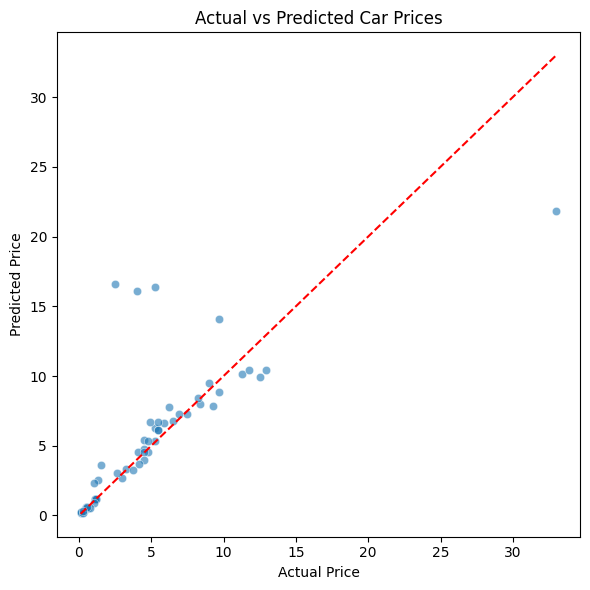

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# Two main questions

# What does OneHotEncode, Compose, ColumnTransformer and RandomForestRegressor do?

# Compose is the parent module inside which the ColumnTransformer lives, ColumnTransformer transforms all the categorical columns into numerical columns, so that ML models can acutally use that Data

# OneHotEncode is a preprocess, that converts the categorical data in to numrical columns

# Both the OneHotEncode and the ColumnTransformer reduce redundancy and make it possible for ML models to learn from categorical data which is usually in Strings.

# RandomForestRegressor is a model used to predict future outcomes, based on decision trees, the more trees, the more accurate the prediction is.

# Can prices which are not currently known be predicted as well? (Prices of cars in the future)

# Yes, Advanced models like the Time Series Model can actually predict car prices in the future like a price of a car in 2027, on the condition that more information is provided. Like providing Economical information such as Inflation.